# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [4]:
# The monthly amount for the member's household income
monthly_income = 12000


#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [6]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response, indent=2, sort_keys=True))


{
  "data": {
    "1": {
      "circulating_supply": 18948687,
      "id": 1,
      "last_updated": 1643979178,
      "max_supply": 21000000,
      "name": "Bitcoin",
      "quotes": {
        "USD": {
          "market_cap": 721461251057,
          "percent_change_1h": 0.343617923218782,
          "percent_change_24h": 4.32443919021632,
          "percent_change_7d": 2.09359129998815,
          "percentage_change_1h": 0.343617923218782,
          "percentage_change_24h": 4.32443919021632,
          "percentage_change_7d": 2.09359129998815,
          "price": 38057.0,
          "volume_24h": 16818648690
        }
      },
      "rank": 1,
      "symbol": "BTC",
      "total_supply": 18948687,
      "website_slug": "bitcoin"
    }
  },
  "metadata": {
    "error": null,
    "num_cryptocurrencies": 3105,
    "timestamp": 1643979178
  }
}


In [7]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent=2, sort_keys=True))


{
  "data": {
    "1027": {
      "circulating_supply": 119441266,
      "id": 1027,
      "last_updated": 1643979229,
      "max_supply": 0,
      "name": "Ethereum",
      "quotes": {
        "USD": {
          "market_cap": 339919458139,
          "percent_change_1h": 0.275457612578378,
          "percent_change_24h": 9.02066767686558,
          "percent_change_7d": 17.8959151185344,
          "percentage_change_1h": 0.275457612578378,
          "percentage_change_24h": 9.02066767686558,
          "percentage_change_7d": 17.8959151185344,
          "price": 2843.49,
          "volume_24h": 14790881621
        }
      },
      "rank": 2,
      "symbol": "ETH",
      "total_supply": 119441266,
      "website_slug": "ethereum"
    }
  },
  "metadata": {
    "error": null,
    "num_cryptocurrencies": 3105,
    "timestamp": 1643979229
  }
}


#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [8]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]

# Print the current price of BTC
print(f"The current price in USD of BTC is ${btc_price}.")


The current price in USD of BTC is $38057.0.


In [9]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]

# Print the current price of ETH
print(f"The current price in USD of ETH is ${eth_price}.")


The current price in USD of ETH is $2843.49.


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [10]:
# Compute the current value of the BTC holding 
btc_value = btc_coins * btc_price

# Print current value of your holding in BTC
print(f"The current value of your holding in BTC is ${btc_value} in USD.")


The current value of your holding in BTC is $45668.4 in USD.


In [11]:
# Compute the current value of the ETH holding 
eth_value = eth_coins * eth_price

# Print current value of your holding in ETH
print(f"The current value of your holding in ETH is ${eth_value} in USD.")


The current value of your holding in ETH is $15070.496999999998 in USD.


In [12]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
print(f"The current cryptocurrency wallet balance in USD is ${total_crypto_wallet}.")


The current cryptocurrency wallet balance in USD is $60738.897.


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [13]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [14]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
    )

display(type(alpaca_api_key))
display(type(alpaca_secret_key))

str

str

#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [15]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ["SPY", "AGG"]

# Set timeframe to 1D 
timeframe = "1D"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp("2022-02-02", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-02-02", tz="America/New_York").isoformat()


#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

In [16]:
# Use the Alpaca get_barset function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
portfolio_df = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date, 
    end = end_date,
    ).df

# Review the first 5 rows of the Alpaca DataFrame
portfolio_df


AGG                                       SPY  \
                            open    high       low   close   volume   open   
time                                                                         
2022-02-02 00:00:00-05:00  111.7  111.97  111.6744  111.72  7424696  455.5   

                                                            
                             high     low  close    volume  
time                                                        
2022-02-02 00:00:00-05:00  458.12  453.05  457.3  97807976

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [17]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = float(portfolio_df["AGG"]["close"])

# Print the AGG closing price
print(f"The AGG closing price is {agg_close_price}.")


The AGG closing price is 111.72.


In [18]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = float(portfolio_df["SPY"]["close"])

# Print the SPY closing price
print(f"The SPY closing price is {spy_close_price}.")


The SPY closing price is 457.3.


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [19]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_close_price * agg_shares

# Print the current value of the bond portfolio
print(f"The current value of the bond portfolio is {agg_value}.")


The current value of the bond portfolio is 22344.0.


In [20]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_close_price * spy_shares

# Print the current value of the stock portfolio
print(f"The current value of the stock portfolio is {spy_value}.")


The current value of the stock portfolio is 50303.0.


In [21]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
print(f"The current balance of the stock and bond portion of the portfolio is {total_stocks_bonds}.")


The current balance of the stock and bond portion of the portfolio is 72647.0.


In [22]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency wallet to the value of the total stocks and bonds 
total_portfolio = total_crypto_wallet + total_stocks_bonds

# Print the total value of the portfolio (crypto, stocks, bonds)
print(f"The total value of the entire savings portfolio is {total_portfolio}.")


The total value of the entire savings portfolio is 133385.897.


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [23]:
# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet, total_stocks_bonds]

# Review the Python list savings_data
savings_data
    

[60738.897, 72647.0]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [24]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(savings_data, columns=["amount"], index=["cyrpto","stock/bond"])

# Display the savings_df DataFrame
savings_df


,amount
cyrpto,60738.897
stock/bond,72647.000


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Total Portfolio Value - Crypto & Stocks/Bonds'}, ylabel='amount'>

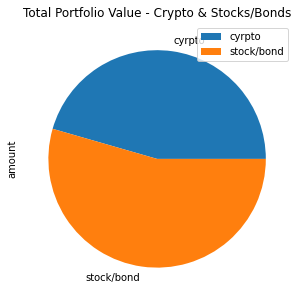

In [25]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot.pie(y='amount', title="Total Portfolio Value - Crypto & Stocks/Bonds", figsize=(5, 5))


#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [26]:
# Create a variable named emergency_fund_value
emergency_fund_value = 3 * monthly_income

# Print the emergency_fund_value
print(f"The value of the emergency fund should be ${emergency_fund_value}.")


The value of the emergency fund should be $36000.


##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [27]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:         
if total_portfolio > emergency_fund_value:
    print("Congratulations, you have enough money in this portfolio to fund the emergency portfolio!")
elif total_portfolio == emergency_fund_value:
    print("Congratulations! You have reached the important financial goal of having a 3-month emergency fund reserve.")
elif total_portfolio < emergency_fund_value:
    print(f"You are ${emergency_fund_value - total_portfolio} away from reaching the goal of having $36,000 in the emergency portfolio.") 


Congratulations, you have enough money in this portfolio to fund the emergency portfolio!


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [28]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
start_date_3yrs_back = pd.Timestamp("2019-02-02", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-02-02", tz="America/New_York").isoformat()

# Set number of rows to 1000 to retrieve the maximum amount of rows
limit_rows = 1000

In [29]:
# Use the Alpaca get_barset function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
prices_3_years_df = alpaca.get_barset(
    tickers, 
    timeframe,
    start=start_date_3yrs_back,
    end=end_date,
    limit=limit_rows
    ).df


# Display both the first and last five rows of the DataFrame
display(prices_3_years_df.head())
display(prices_3_years_df.tail())

AGG                                          \
                             open      high      low     close     volume   
time                                                                        
2019-02-04 00:00:00-05:00  106.83  106.9000  106.770  106.8950  9790488.0   
2019-02-05 00:00:00-05:00  106.95  107.1400  106.950  107.0900  4918385.0   
2019-02-06 00:00:00-05:00  107.20  107.2200  106.985  107.0441  6022187.0   
2019-02-07 00:00:00-05:00  107.15  107.1983  107.030  107.1500  3080898.0   
2019-02-08 00:00:00-05:00  107.17  107.3800  107.170  107.3550  2988674.0   

                              SPY                                      
                             open      high     low   close    volume  
time                                                                   
2019-02-04 00:00:00-05:00  270.11  271.8000  269.36  271.78  46985797  
2019-02-05 00:00:00-05:00  272.44  273.4400  271.88  273.13  61540042  
2019-02-06 00:00:00-05:00  272.79  273.3400  271.92  272.70  43446324  
2019-02-07 00:00:00-05:00  270.94  271.5500  268.29  269.97  83380785  
2019-02-08 00:00:00-05:00  268.75  270.2874  267.83  270.08  63409417

AGG                                          \
                             open      high       low   close      volume   
time                                                                        
2022-01-27 00:00:00-05:00  111.62  111.8800  111.6200  111.72   5836124.0   
2022-01-28 00:00:00-05:00  111.46  111.8600  111.4400  111.81  10400422.0   
2022-01-31 00:00:00-05:00  111.64  111.8900  111.6000  111.78  11437834.0   
2022-02-01 00:00:00-05:00  111.66  111.6764  111.3800  111.59   9477222.0   
2022-02-02 00:00:00-05:00  111.70  111.9700  111.6744  111.72   7424696.0   

                              SPY                                        
                             open    high       low    close     volume  
time                                                                     
2022-01-27 00:00:00-05:00  438.26  441.58  429.4500  431.270  136251597  
2022-01-28 00:00:00-05:00  432.70  442.00  427.8200  441.920  142062305  
2022-01-31 00:00:00-05:00  441.24  450.28  439.8100  449.815  128202383  
2022-02-01 00:00:00-05:00  450.72  453.63  446.9384  452.960  106515279  
2022-02-02 00:00:00-05:00  455.50  458.12  453.0500  457.300   97807976

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [30]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
MC_30_year_sim=MCSimulation(
    portfolio_data=prices_3_years_df,
    weights=[.60, .40],
    num_simulation=500,
    num_trading_days=252*30)

# Review the simulation input data
MC_30_year_sim.portfolio_data.head()


AGG                                          \
                             open      high      low     close     volume   
time                                                                        
2019-02-04 00:00:00-05:00  106.83  106.9000  106.770  106.8950  9790488.0   
2019-02-05 00:00:00-05:00  106.95  107.1400  106.950  107.0900  4918385.0   
2019-02-06 00:00:00-05:00  107.20  107.2200  106.985  107.0441  6022187.0   
2019-02-07 00:00:00-05:00  107.15  107.1983  107.030  107.1500  3080898.0   
2019-02-08 00:00:00-05:00  107.17  107.3800  107.170  107.3550  2988674.0   

                                           SPY                            \
                          daily_return    open      high     low   close   
time                                                                       
2019-02-04 00:00:00-05:00          NaN  270.11  271.8000  269.36  271.78   
2019-02-05 00:00:00-05:00     0.001824  272.44  273.4400  271.88  273.13   
2019-02-06 00:00:00-05:00    -0.000429  272.79  273.3400  271.92  272.70   
2019-02-07 00:00:00-05:00     0.000989  270.94  271.5500  268.29  269.97   
2019-02-08 00:00:00-05:00     0.001913  268.75  270.2874  267.83  270.08   

                                                  
                             volume daily_return  
time                                              
2019-02-04 00:00:00-05:00  46985797          NaN  
2019-02-05 00:00:00-05:00  61540042     0.004967  
2019-02-06 00:00:00-05:00  43446324    -0.001574  
2019-02-07 00:00:00-05:00  83380785    -0.010011  
2019-02-08 00:00:00-05:00  63409417     0.000407

In [31]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_year_sim.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.014121,1.005143,0.996798,1.006288,1.004892,1.004456,0.992661,1.007114,0.986422,0.998031,...,1.001146,0.996971,1.002133,0.991296,1.000031,1.003100,1.006111,0.997928,0.992825,0.996193
2,1.015436,1.007504,1.000187,1.011188,1.004832,0.999380,1.003528,1.001738,0.987757,0.996863,...,1.007256,0.996849,1.003025,0.993986,1.015988,0.994604,1.002770,0.996255,0.983505,0.997738
3,1.008221,1.007485,0.991604,1.006168,1.010175,0.991088,1.013397,0.996742,0.995851,0.993958,...,1.002800,0.991293,1.006041,1.003100,1.016477,0.996305,0.998260,0.992367,0.984354,0.993455
4,1.011451,1.010890,1.001375,1.016576,1.006114,0.992737,1.010205,0.999604,0.996484,0.982018,...,1.004890,0.984118,1.005253,1.006410,1.007225,0.998836,1.005232,0.996457,0.976545,0.993370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,22.115000,12.646230,11.616876,11.043689,22.633060,5.289251,31.572098,7.403937,6.119252,7.644518,...,4.359070,10.320636,14.991905,9.347621,9.514306,11.727318,8.299663,41.865785,34.260695,7.956461
7557,22.183635,12.537176,11.561192,11.064659,22.672337,5.304144,31.481814,7.398642,6.074006,7.690142,...,4.346583,10.284524,14.976330,9.252597,9.633886,11.616445,8.317859,41.578078,34.472465,7.918089
7558,22.088051,12.579467,11.621830,10.983470,22.845219,5.275589,31.297202,7.379542,6.072237,7.709308,...,4.369410,10.240900,15.009922,9.254650,9.622311,11.578241,8.328498,41.337111,34.194896,7.929370
7559,22.226127,12.508343,11.669974,10.963521,22.852004,5.316889,31.453604,7.394794,6.085296,7.725559,...,4.371407,10.318049,14.961660,9.174337,9.678066,11.613514,8.346660,41.827798,34.281385,7.898009


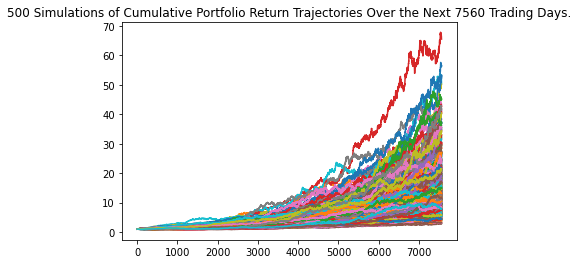

In [32]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
MC_30_year_sim_line_plot = MC_30_year_sim.plot_simulation()


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

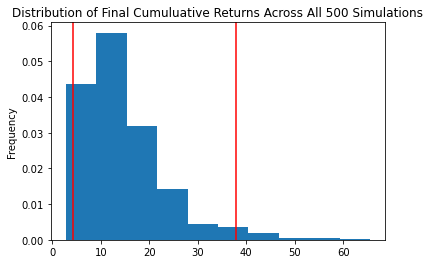

In [33]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
MC_30_year_sim_hist_plot = MC_30_year_sim.plot_distribution()


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [34]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
MC_30_year_sim_stats = MC_30_year_sim.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
MC_30_year_sim_stats

count           500.000000
mean             14.817996
std               8.822461
min               2.774886
25%               8.652842
50%              12.763857
75%              18.528092
max              65.527584
95% CI Lower      4.303090
95% CI Upper     37.768615
Name: 7560, dtype: float64

### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [35]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"The current balance of the stock and bond portion of the portfolio is {total_stocks_bonds}.")


The current balance of the stock and bond portion of the portfolio is 72647.0.


In [43]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = round(MC_30_year_sim_stats[8] * total_stocks_bonds, 2)
ci_upper_thirty_cumulative_return = round(MC_30_year_sim_stats[9] * total_stocks_bonds, 2)

# Print the result of your calculations
print(f"There is a 95% chance that the current value of the stock and bond portion in the portfolio ($72,647)"
      f" with a 60% weight in SPY and 40% weight in AGG over the next 30 years will end within the range of"
      f" ${ci_lower_thirty_cumulative_return} and ${ci_upper_thirty_cumulative_return}.")


There is a 95% chance that the current value of the stock and bond portion in the portfolio ($72,647) with a 60% weight in SPY and 40% weight in AGG over the next 30 years will end within the range of $312606.57 and $2743776.59.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [41]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
MC_10_year_sim=MCSimulation(
    portfolio_data=prices_3_years_df,
    weights=[.80, .20],
    num_simulation=500,
    num_trading_days=252*10)

# Review the simulation input data
MC_10_year_sim.portfolio_data.head()


AGG                                          \
                             open      high      low     close     volume   
time                                                                        
2019-02-04 00:00:00-05:00  106.83  106.9000  106.770  106.8950  9790488.0   
2019-02-05 00:00:00-05:00  106.95  107.1400  106.950  107.0900  4918385.0   
2019-02-06 00:00:00-05:00  107.20  107.2200  106.985  107.0441  6022187.0   
2019-02-07 00:00:00-05:00  107.15  107.1983  107.030  107.1500  3080898.0   
2019-02-08 00:00:00-05:00  107.17  107.3800  107.170  107.3550  2988674.0   

                                           SPY                            \
                          daily_return    open      high     low   close   
time                                                                       
2019-02-04 00:00:00-05:00          NaN  270.11  271.8000  269.36  271.78   
2019-02-05 00:00:00-05:00     0.001824  272.44  273.4400  271.88  273.13   
2019-02-06 00:00:00-05:00    -0.000429  272.79  273.3400  271.92  272.70   
2019-02-07 00:00:00-05:00     0.000989  270.94  271.5500  268.29  269.97   
2019-02-08 00:00:00-05:00     0.001913  268.75  270.2874  267.83  270.08   

                                                  
                             volume daily_return  
time                                              
2019-02-04 00:00:00-05:00  46985797          NaN  
2019-02-05 00:00:00-05:00  61540042     0.004967  
2019-02-06 00:00:00-05:00  43446324    -0.001574  
2019-02-07 00:00:00-05:00  83380785    -0.010011  
2019-02-08 00:00:00-05:00  63409417     0.000407

In [44]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_year_sim.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996946,0.998719,0.996546,0.997786,0.996562,1.000982,0.997416,1.008188,0.998699,1.003837,...,1.003091,0.998920,1.005186,0.995305,0.998919,0.999059,1.001969,0.994812,1.008887,0.998956
2,1.000624,0.997856,0.995013,0.994974,0.997626,1.002389,0.999203,1.010096,0.993420,1.000698,...,0.993018,1.001565,1.004041,0.991815,0.997922,1.004128,1.001465,0.983159,1.009014,1.002904
3,0.996462,1.001803,0.995479,0.988799,0.998305,1.005814,1.001421,1.010860,0.992783,1.005721,...,0.992983,1.007657,1.007047,0.994561,0.999064,1.000864,0.999610,0.983901,1.009618,1.006681
4,0.998037,1.005456,1.001146,0.994660,1.001047,1.003719,1.005460,1.009653,0.984998,1.003259,...,0.997437,1.011326,1.008886,0.997310,0.994642,0.998365,0.992169,0.986863,1.004306,1.006719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.458435,1.213232,1.385241,1.407626,1.699528,1.285697,1.686063,1.949048,1.300382,2.022691,...,1.500911,1.930156,2.154889,1.806393,1.792177,1.155430,1.542303,1.697442,1.186039,1.300055
2517,1.453571,1.213798,1.386558,1.412252,1.688878,1.290331,1.688634,1.934602,1.301182,2.017654,...,1.500694,1.917869,2.169330,1.811484,1.790412,1.162883,1.543499,1.689851,1.183285,1.298409
2518,1.461714,1.214507,1.385136,1.409579,1.699080,1.285389,1.684098,1.939950,1.295809,2.008165,...,1.502957,1.899350,2.158012,1.814239,1.796426,1.155429,1.540544,1.679692,1.188159,1.306506
2519,1.465619,1.218625,1.380507,1.405906,1.687860,1.286992,1.680776,1.938299,1.303842,1.996836,...,1.506746,1.884609,2.156102,1.821479,1.790208,1.153945,1.533064,1.682325,1.188411,1.312367


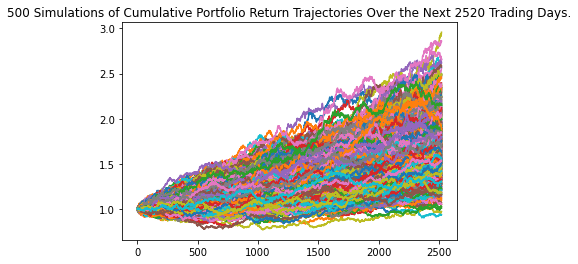

In [46]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
MC_10_year_sim_line_plot = MC_10_year_sim.plot_simulation()


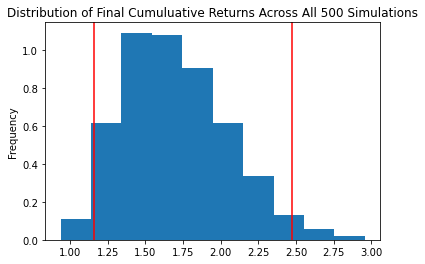

In [47]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_10_year_sim_hist_plot = MC_10_year_sim.plot_distribution()


In [48]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
MC_10_year_sim_stats = MC_10_year_sim.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
MC_10_year_sim_stats

count           500.000000
mean              1.705044
std               0.345708
min               0.937755
25%               1.451293
50%               1.682029
75%               1.930218
max               2.956329
95% CI Lower      1.159029
95% CI Upper      2.470620
Name: 2520, dtype: float64

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [ ]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"The current balance of the stock and bond portion of the portfolio is {total_stocks_bonds}.")


In [49]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = round(MC_10_year_sim_stats[8] * total_stocks_bonds, 2)
ci_upper_ten_cumulative_return = round(MC_10_year_sim_stats[9] * total_stocks_bonds, 2)

# Print the result of your calculations
print(f"There is a 95% chance that the current value of the stock and bond portion in the portfolio ($72,647)"
      f" with a 80% weight in SPY and 20% weight in AGG over the next 10 years will end within the range of"
      f" ${ci_lower_ten_cumulative_return} and ${ci_upper_ten_cumulative_return}.")


There is a 95% chance that the current value of the stock and bond portion in the portfolio ($72,647) with a 80% weight in SPY and 20% weight in AGG over the next 10 years will end within the range of $84199.95 and $179483.15.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?